## Descrição do problema

- Este projeto visa entender como a performance dos estudantes em exames é afetada por diferentes variáveis como gênero, etnia, nível de educação e curso de preparação.

Base de dados:  https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.shape

(1000, 8)

### Informação sobre os dados
- gender:sexo do estudante
- race/ethnicity : etnia dos estudantes -> (Group A, B,C, D,E)
- parental level of education : nível de formação dos pais ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : almoço antes da prova (standard or free/reduced)
- test preparation course : completo ou não completo antes do teste
- math score - pontuação de matemática
- reading score - pontuação de leitura
- writing score - pontuação de escrita

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Check missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Check duplicates

In [6]:
df.duplicated().sum()

0

### Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check statistics

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploring data

In [10]:
# adding columns for total score and average
df['total_score'] = df['math_score'] + df['writing_score'] + df['reading_score']
df['average'] = df['total_score']/3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


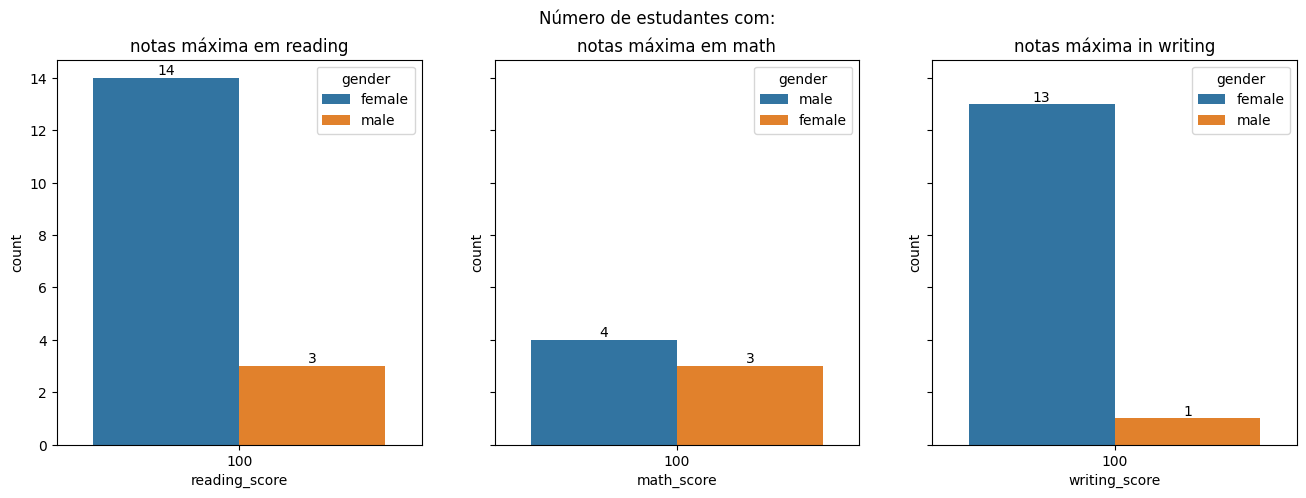

In [32]:
fig, axes = plt.subplots(1, 3,sharey=True, figsize=(16,5))
fig.suptitle('Número de estudantes com:')
sns.countplot(df[(df['reading_score'] == 100)], x='reading_score',ax=axes[0], hue='gender')
#axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('notas máxima em reading')
for container in axes[0].containers:
    tmp_hue = df.loc[df['reading_score']==container.get_label()]
    axes[0].bar_label(container, labels=tmp_hue['gender'])


sns.countplot(df[(df['math_score'] == 100)], x='math_score',ax=axes[1],hue='gender')
#axes[1].bar_label(axes[1].containers[0])
for container in axes[1].containers:
    tmp_hue = df.loc[df['math_score']==container.get_label()]
    axes[1].bar_label(container, labels=tmp_hue['gender'])
axes[1].set_title('notas máxima em math')

insert_axes(axes[2])

sns.countplot(df[(df['writing_score'] == 100)], x='writing_score',ax=axes[2], hue='gender')
#axes[2].bar_label(axes[2].containers[0])
for container in axes[2].containers:
    tmp_hue = df.loc[df['writing_score']==container.get_label()]
    axes[2].bar_label(container, labels=tmp_hue['gender'])
axes[2].set_title('notas máxima in writing')
fig.show()

- Vemos que para matemática o número de notas máximas é o mais baixo
- Em reading e writing as mulheres têm muito mais pontuações máximas do que os homens

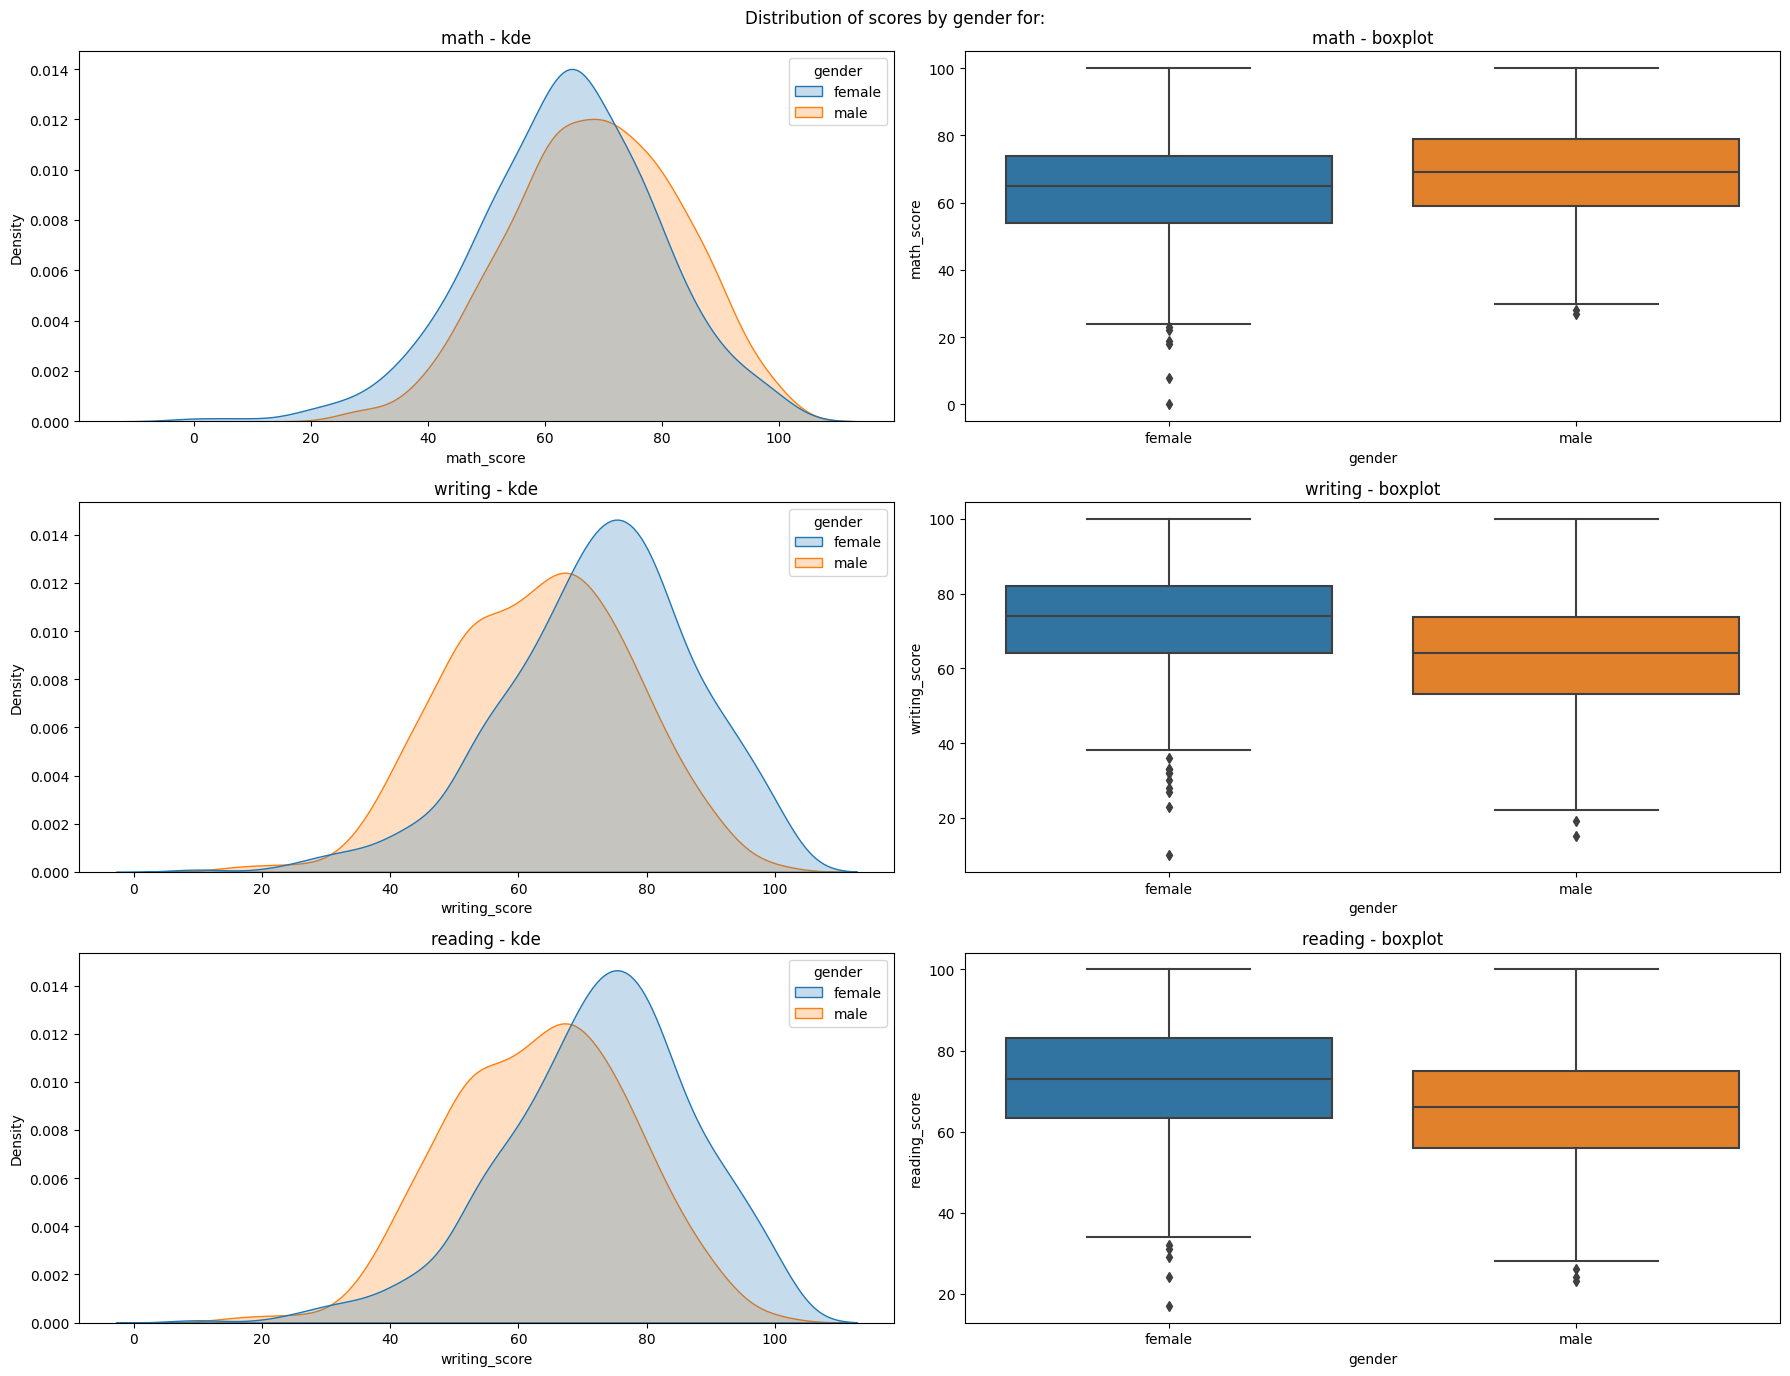

In [33]:
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
fig.suptitle('Distribution of scores by gender for:')

sns.kdeplot(data=df,x='math_score', hue='gender',shade=True,ax=axes[0,0])
axes[0,0].set_title('math - kde')
sns.boxplot(df, x='gender',y='math_score',ax=axes[0,1])
axes[0,1].set_title('math - boxplot')

sns.kdeplot(data=df,x='writing_score', hue='gender',shade=True,ax=axes[1,0])
axes[1,0].set_title('writing - kde')
sns.boxplot(df, x='gender',y='writing_score',ax=axes[1,1])
axes[1,1].set_title('writing - boxplot')

sns.kdeplot(data=df,x='writing_score', hue='gender',shade=True,ax=axes[2,0])
axes[2,0].set_title('reading - kde')
sns.boxplot(df, x='gender',y='reading_score',ax=axes[2,1])
axes[2,1].set_title('reading - boxplot')
fig.tight_layout()

De acordo com as distribuições, as pontuações das mulheres são maiores do que as dos homens, exceto em matemática.

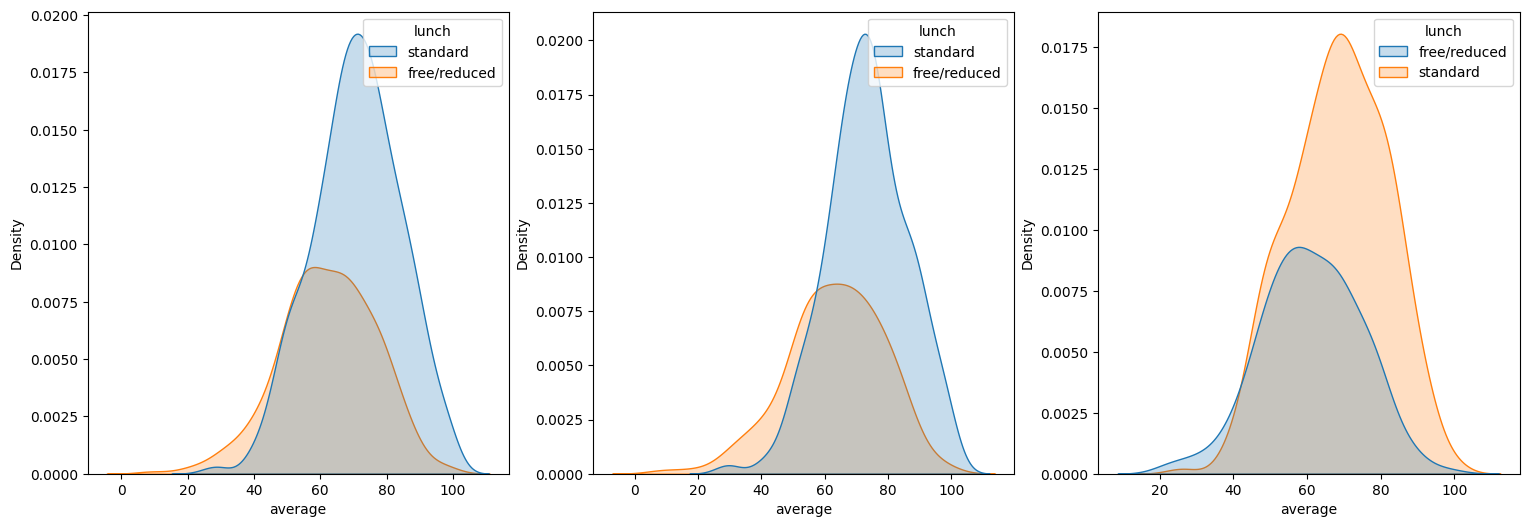

In [34]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.kdeplot(data=df,x='average',shade=True,hue='lunch')
plt.subplot(142)
sns.kdeplot(data=df[df.gender=='female'],x='average',shade=True,hue='lunch')
plt.subplot(143)
sns.kdeplot(data=df[df.gender=='male'],x='average',shade=True,hue='lunch')
plt.show()

- O almoço padrão standard ajuda a ter um bom desempenho nos exames.
- O almoço padrão standard ajuda a ter um bom desempenho nos exames, seja masculino ou feminino.

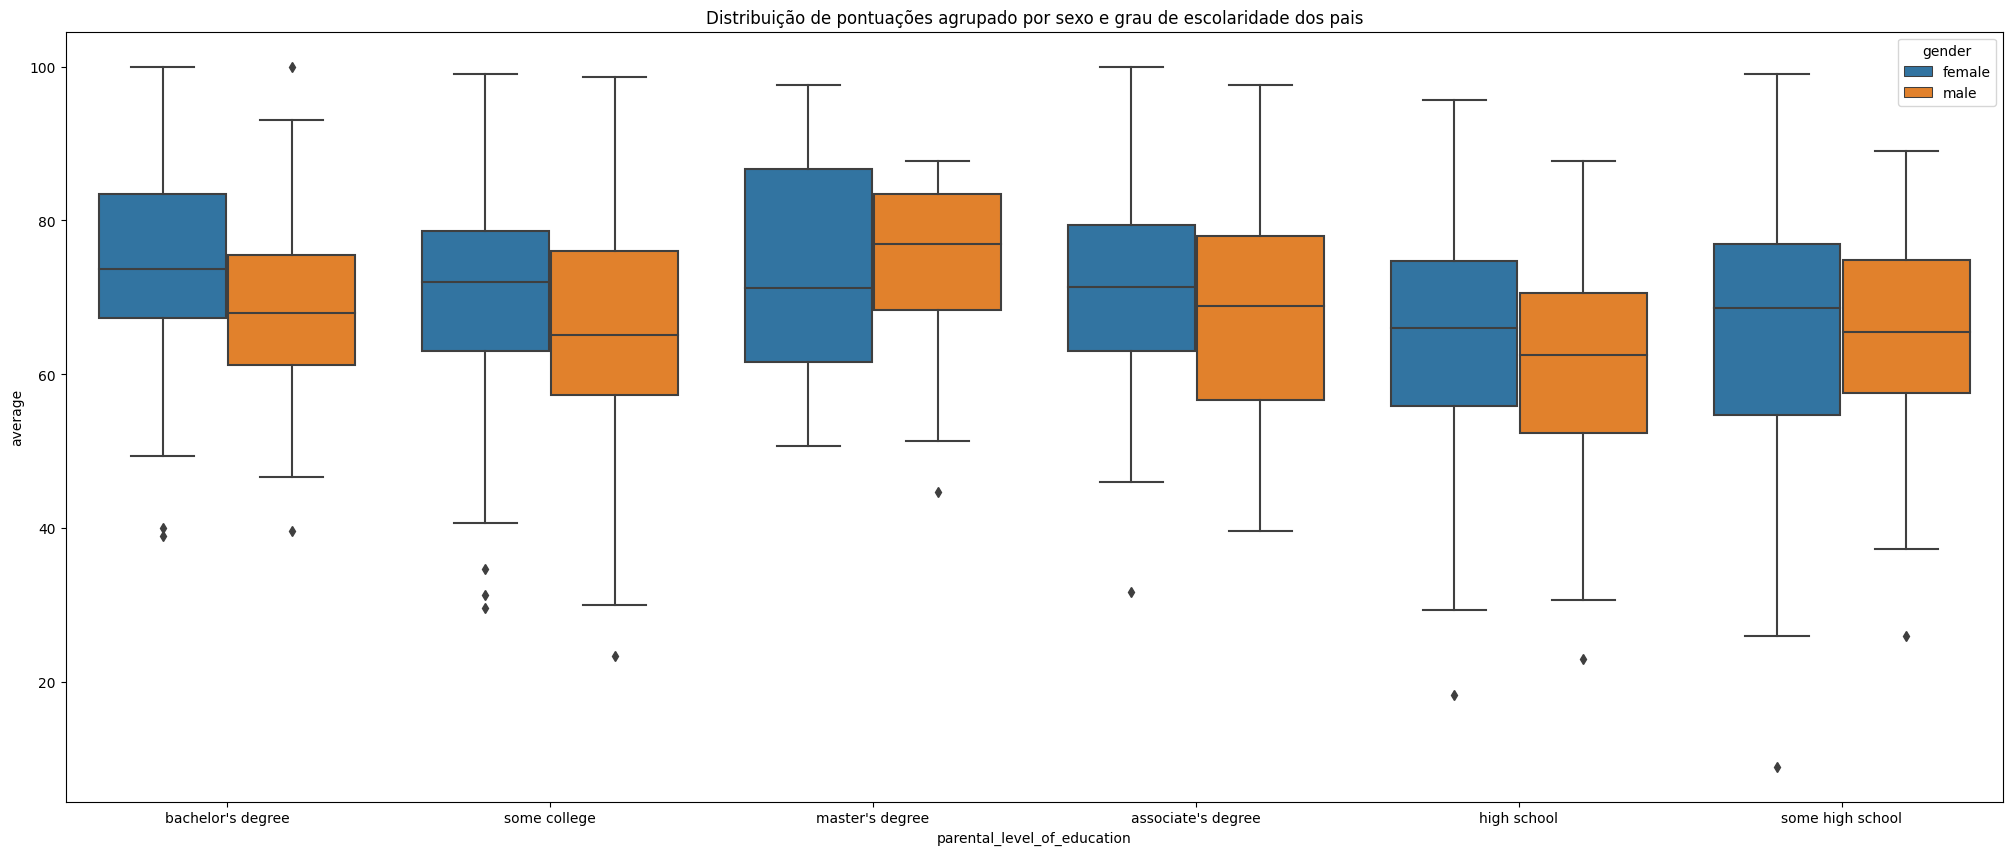

In [45]:
fig = plt.figure(figsize=(25, 10))
sns.boxplot(df,x='parental_level_of_education',y='average',hue='gender')
plt.title('Distribuição de pontuações agrupado por sexo e grau de escolaridade dos pais')
fig.show()

- Em geral, a educação dos pais não ajuda o aluno a ter um bom desempenho no exame.
- Os gráficos nos mostram que os pais cuja educação é de grau de associado, seu filho do sexo masculino tende a ter um bom desempenho no exame, sendo este o grupo com a mediana mais alta
- No geral, o grau de educação dos pais não influe nas notas das estudantes, pois todas tem uma mediana muito próxima

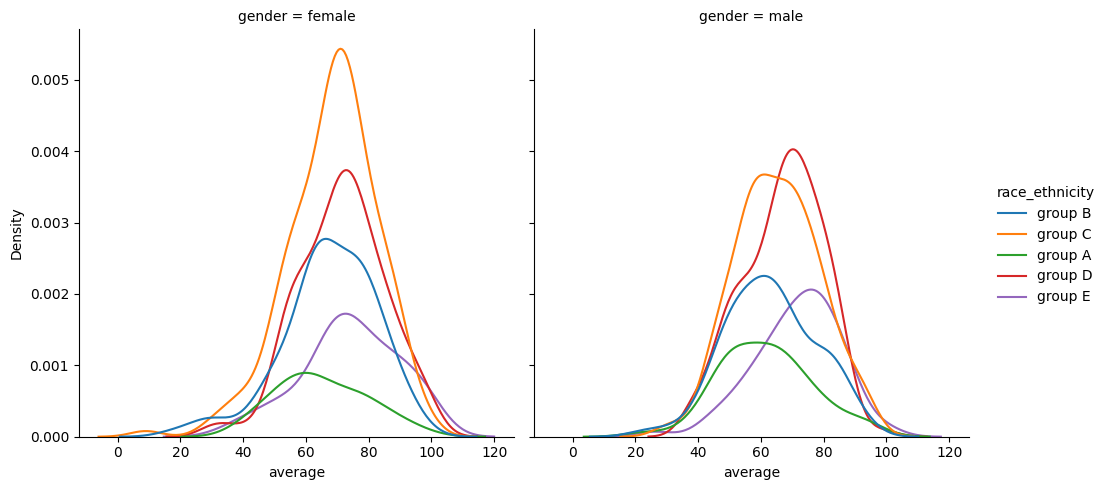

In [54]:
sns.displot(data=df,x='average',hue='race_ethnicity',col='gender',kind='kde')

- Os alunos do grupo A e do grupo B tendem a ter um desempenho ruim no exame, dado um enviesamento um pouco mais para esquerda comparado as outras distribuições.
- Os alunos do grupo C e do grupo D tendem a ter um desempenho melhor no exame, independentemente de serem homens ou mulheres

- Número de alunos do sexo masculino e feminino é quase igual
- Número de alunos é maior no Grupo C
- Número de alunos que têm almoço padrão é maior
- Número de alunos que não se matricularam em nenhum curso preparatório é maior
- O número de alunos cuja escolaridade dos pais é "Alguma faculdade" é maior, seguido de perto por "Graduação de associado"

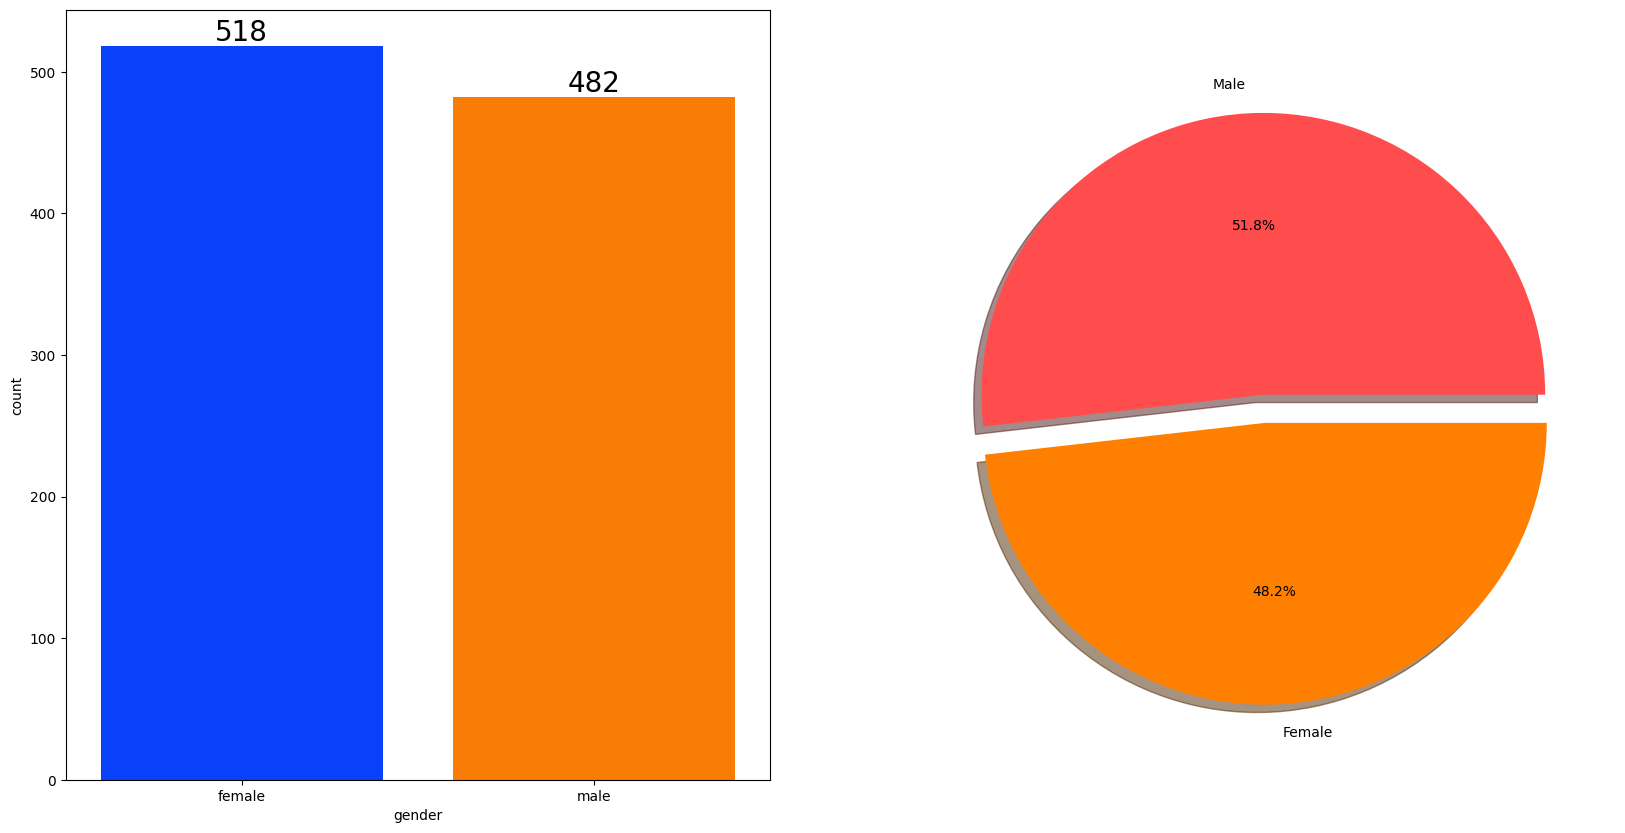

In [55]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

O sexo tem dados equilibrados com os alunos do sexo feminino são 518 (48%) e os alunos do sexo masculino são 482 (52%)

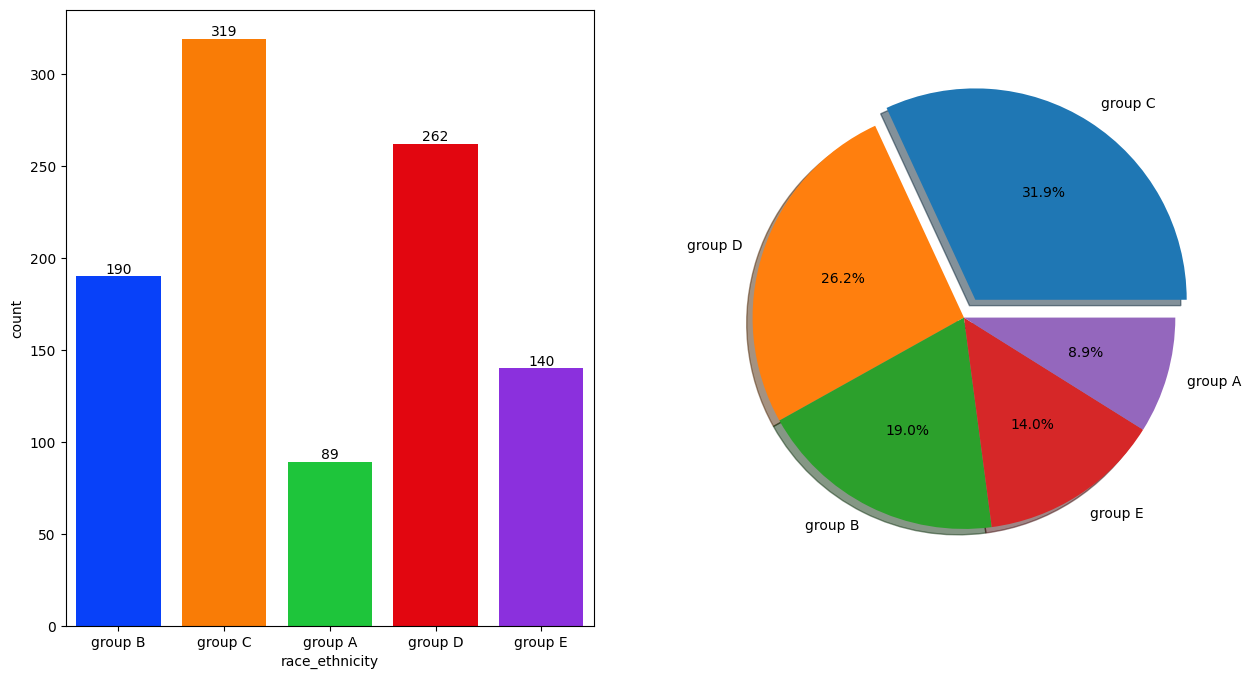

In [61]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

A maioria dos alunos pertence ao grupo C/grupo D. O menor número de alunos pertence ao grupo A.

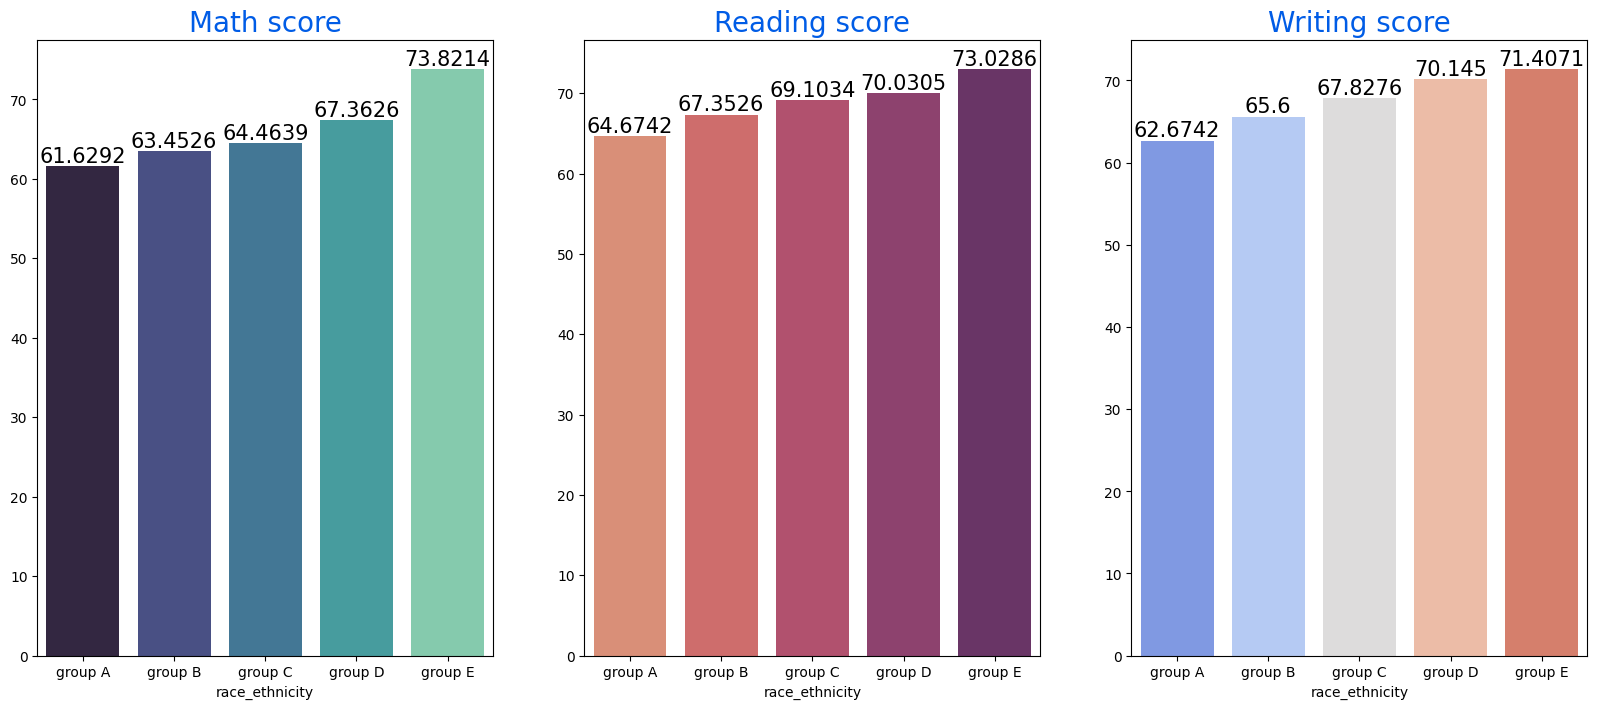

In [62]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

- Os alunos do Grupo E obtiveram as notas mais altas.
- Os alunos do grupo A obtiveram as notas mais baixas.
- Alunos de nível socioeconômico mais baixo têm uma média mais baixa em todas as disciplinas do curso

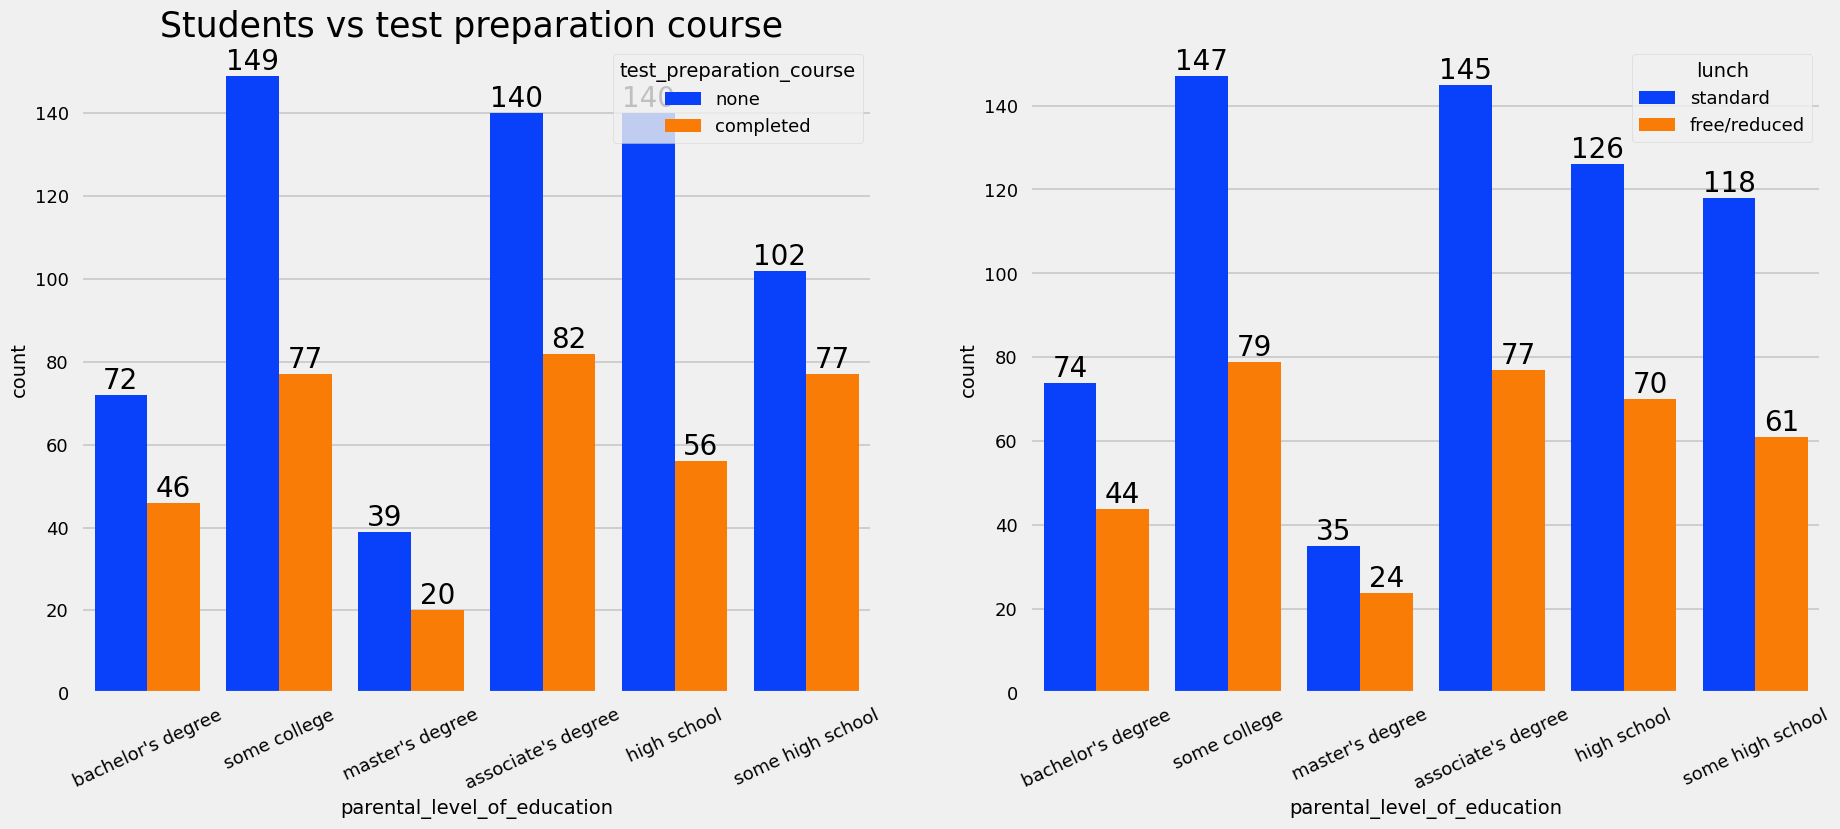

In [71]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
 
for tick in ax[0].get_xticklabels():
    tick.set_rotation(25)


sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(25)

Os alunos que recebem almoço padrão tendem a ter um desempenho melhor do que os alunos que recebem almoço grátis/a preço reduzido

<Axes: xlabel='lunch', ylabel='writing_score'>

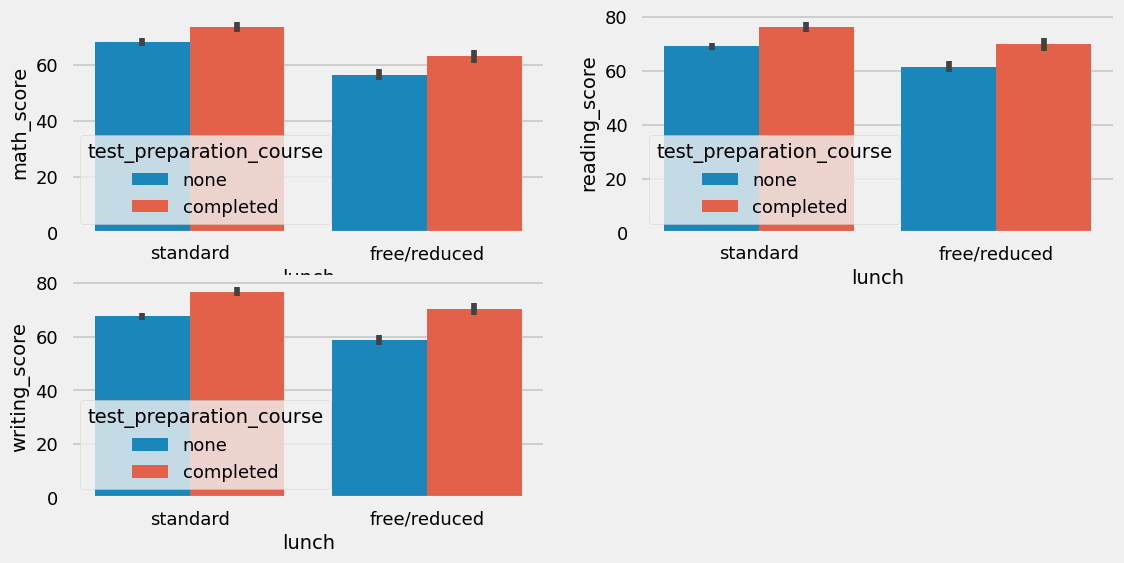

In [72]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Os alunos que concluíram o Curso Preparatório para Testes têm pontuações mais altas em todas as três categorias do que aqueles que não fizeram o curso

### Checking outliers

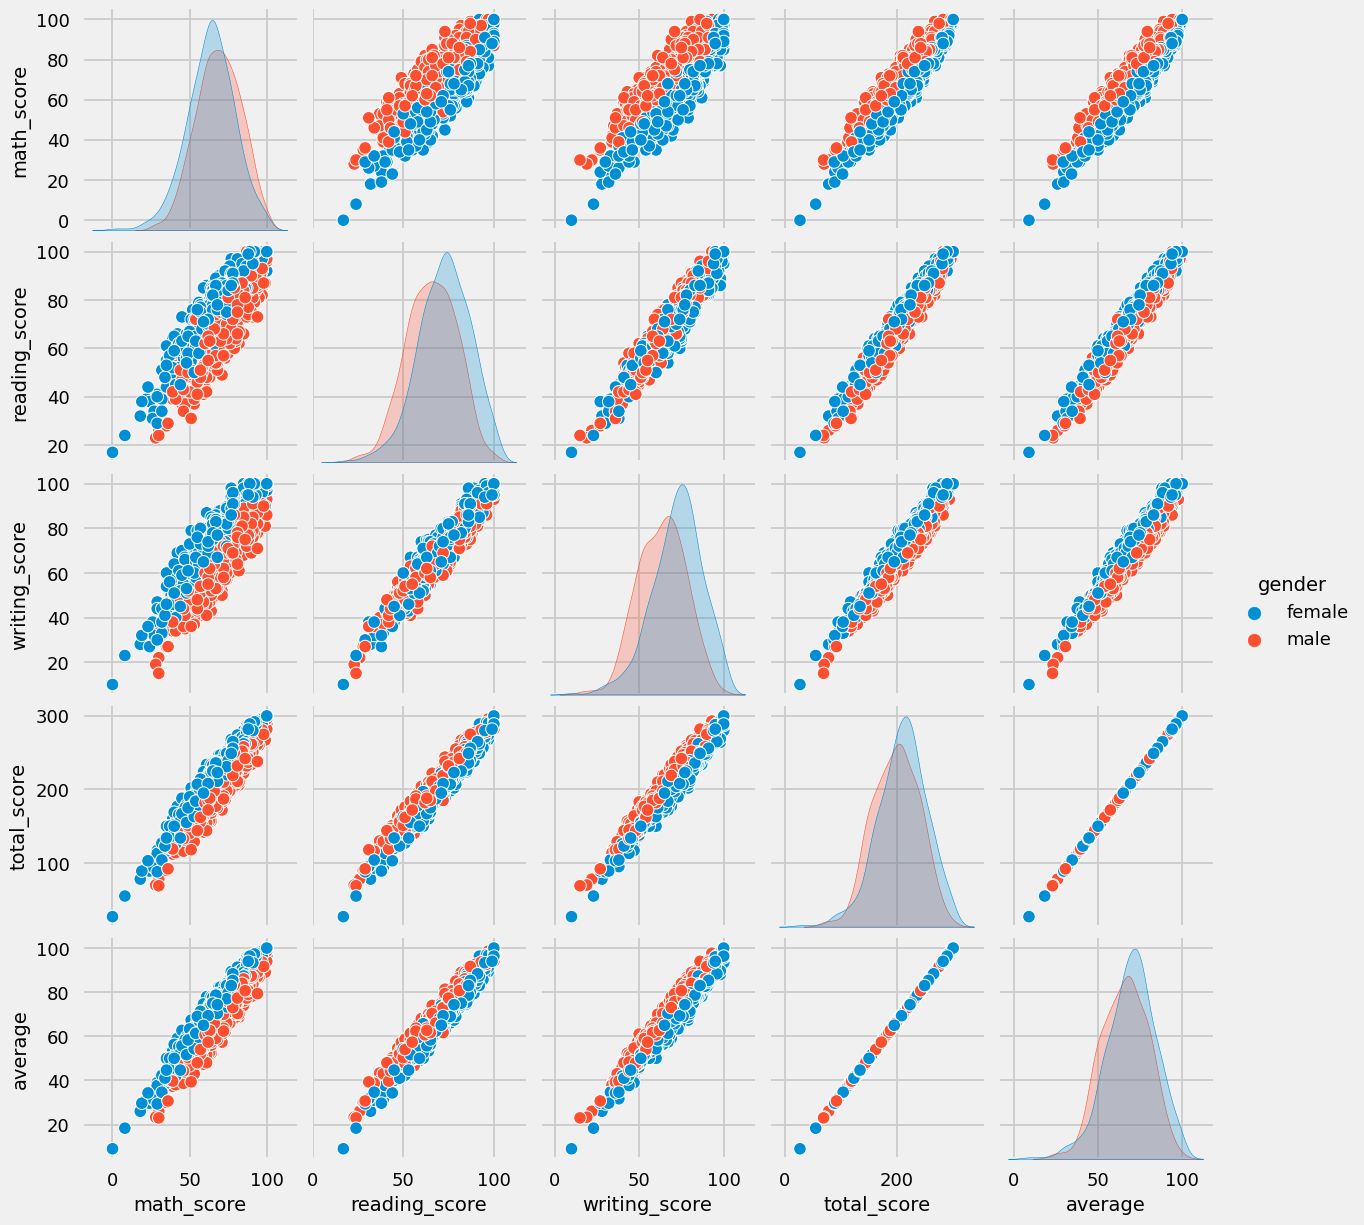

In [74]:
sns.pairplot(df,hue = 'gender')
plt.show()